In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import json
import csv

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
def flatten_json(data):
    flattened_data = {}

    def flatten(item, prefix=""):
        if isinstance(item, dict):
            for key, value in item.items():
                new_key = f"{prefix}_{key}" if prefix else key
                flatten(value, new_key)
        else:
            flattened_data[prefix] = item

    flatten(data)
    return flattened_data


def json_to_csv(json_data, csv_file):
    # Open the JSON file
    with open(json_data, 'r') as file:
        data = json.load(file)

    # Flatten the JSON data
    flattened_data = [flatten_json(item) for item in data]

    # Extract field names
    field_names = set()
    for item in flattened_data:
        field_names.update(item.keys())

    # Open the CSV file
    with open(csv_file, 'w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=field_names)
        writer.writeheader()
        writer.writerows(flattened_data)

    print("Conversion completed successfully.")

# Usage
json_file = "/content/drive/MyDrive/Kerja/Mileapp/data.json"  # Replace with your JSON file path
csv_file = "/content/drive/MyDrive/Kerja/Mileapp/data.csv"    # Replace with your desired CSV file path
json_to_csv(json_file, csv_file)

Conversion completed successfully.


In [85]:
df = pd.read_csv('/content/drive/MyDrive/Kerja/Mileapp/data.csv')

# Data Preparation

In [86]:
df = df[['taskId','taskCreatedTime','taskCompletedTime','taskStatus','taskAssignedTo','taskLocationDone_lon','taskLocationDone_lat','flow',
  'cod_amount','cod_received','UserVar_taskStatus','UserVar_taskStatusLabel','UserVar_taskDetailStatus','UserVar_taskDetailStatusLabel',
  'UserVar_branch_origin','UserVar_branch_dest','UserVar_weight','UserVar_receiver_city']]

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskId                         8334 non-null   object 
 1   taskCreatedTime                8334 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   taskAssignedTo                 8333 non-null   object 
 5   taskLocationDone_lon           7566 non-null   float64
 6   taskLocationDone_lat           7566 non-null   float64
 7   flow                           8334 non-null   object 
 8   cod_amount                     2358 non-null   float64
 9   cod_received                   2358 non-null   object 
 10  UserVar_taskStatus             7572 non-null   object 
 11  UserVar_taskStatusLabel        7572 non-null   object 
 12  UserVar_taskDetailStatus       7572 non-null   o

In [88]:
# check if taskId is unique
len(df) == len(df['taskId'].unique())

True

## Check Missing Values

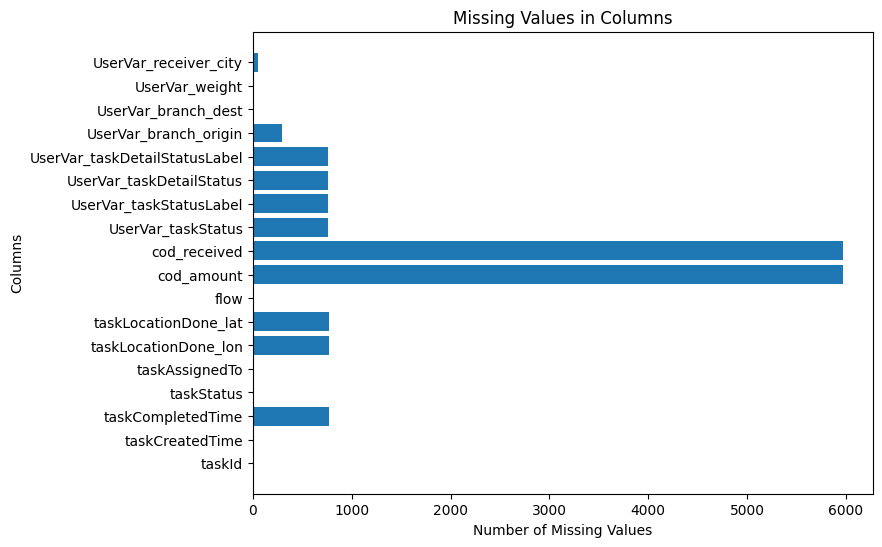

In [89]:
missing_values = df.isnull().sum()

missing_values_df = pd.DataFrame(missing_values)
missing_values_df = missing_values_df.rename(columns={0: 'Missing Values'})
missing_values_df = missing_values_df.reset_index().rename(columns={'index': 'Columns'})
missing_values_df = missing_values_df.set_index('Columns')

plt.figure(figsize=(8, 6))
plt.barh(missing_values_df.index, missing_values_df['Missing Values'])
plt.xlabel('Number of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values in Columns')
plt.show()

In [90]:
missing_values

taskId                              0
taskCreatedTime                     0
taskCompletedTime                 768
taskStatus                          0
taskAssignedTo                      1
taskLocationDone_lon              768
taskLocationDone_lat              768
flow                                0
cod_amount                       5976
cod_received                     5976
UserVar_taskStatus                762
UserVar_taskStatusLabel           762
UserVar_taskDetailStatus          762
UserVar_taskDetailStatusLabel     762
UserVar_branch_origin             293
UserVar_branch_dest                 0
UserVar_weight                      0
UserVar_receiver_city              52
dtype: int64

check unique values in each columns

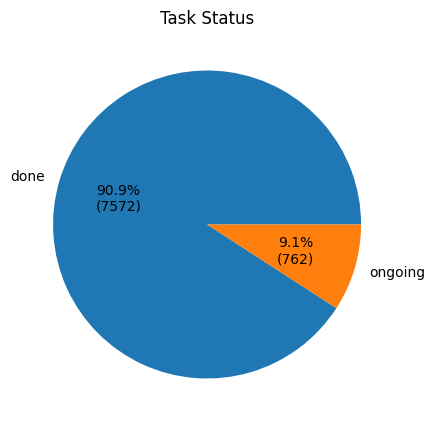

In [91]:
taskstatus_cnt = df['taskStatus'].value_counts()
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format
plt.figure(figsize=(5, 5))
plt.pie(taskstatus_cnt,labels = taskstatus_cnt.index, autopct=autopct_format(taskstatus_cnt))
plt.title('Task Status')
plt.show()

In [92]:
df['flow'].value_counts()

Delivery    8334
Name: flow, dtype: int64

In [93]:
df['cod_received'].value_counts()

False    1663
True      695
Name: cod_received, dtype: int64

In [94]:
df['UserVar_taskStatus'].value_counts()

COLF01    5427
COLF02    2145
Name: UserVar_taskStatus, dtype: int64

In [95]:
df['UserVar_taskStatusLabel'].value_counts()

Success    5427
Failed     2145
Name: UserVar_taskStatusLabel, dtype: int64

In [96]:
df['UserVar_taskDetailStatusLabel'].value_counts()

YANG BERSANGKUTAN                                    3109
KELUARGA/SAUDARA                                      774
MISROUTE                                              763
ATASAN/STAFF/KARYAWAN/BAWAHAN                         634
SECURITY                                              564
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL           322
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)           304
NEW ADDRESS                                           247
DIAMBIL SENDIRI                                       100
SUAMI/ISTRI/ANAK                                       94
RECEPTIONIST                                           87
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR             70
PENERIMA TIDAK DIKENAL                                 64
MAILING ROOM                                           62
PEMBANTU                                               61
DITOLAK OLEH PENERIMA                                  52
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                   48
PENERIMA PINDA

find pattern of the missing values. turns out that some values are still missing because the taskStatus is still 'ongoing'

In [97]:
check_taskDetailStatus = df[df['UserVar_taskStatusLabel'].isna()]
check_taskDetailStatus.taskStatus.value_counts()

ongoing    762
Name: taskStatus, dtype: int64

In [98]:
check_taskStatusLabel = df[df['UserVar_taskStatusLabel'].isna()]
check_taskStatusLabel.taskStatus.value_counts()

ongoing    762
Name: taskStatus, dtype: int64

In [99]:
# there are still 6 missval but with 'done' status 
check_taskCompletedTime = df[df['taskCompletedTime'].isna()]
check_taskCompletedTime.taskStatus.value_counts()

ongoing    762
done         6
Name: taskStatus, dtype: int64

In [100]:
# the 6 rows contains the same values for taskAssignedTo, UserVar_branch_dest, and UserVar_taskStatusLabel means that 
# the values are just missing but the deliveries are already being received
check_taskCompletedTime[check_taskCompletedTime['taskStatus']=='done']

,taskId,taskCreatedTime,taskCompletedTime,taskStatus,taskAssignedTo,taskLocationDone_lon,taskLocationDone_lat,flow,cod_amount,cod_received,UserVar_taskStatus,UserVar_taskStatusLabel,UserVar_taskDetailStatus,UserVar_taskDetailStatusLabel,UserVar_branch_origin,UserVar_branch_dest,UserVar_weight,UserVar_receiver_city
550,9779ae5b5f88ba0bf31c,2022-11-01 15:04:06 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,3.0,"BABELAN,CIKARANG"
551,8ade827b1e3530c02e82,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,4.9,"BABELAN,CIKARANG"
552,292b1e9f73099dac1209,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,8.0,"BABELAN,CIKARANG"
553,7e8862b3f4010465f006,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BDO,BKI,17.0,"BABELAN,CIKARANG"
554,a4fb8aed363abc3d6af3,2022-11-01 10:13:02 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,1.0,"BABELAN,CIKARANG"
555,38e5d762840ec39984b1,2022-11-01 10:13:03 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BTJ,BKI,1.0,"BABELAN,CIKARANG"


In [101]:
# check if the courier also have another task outside the 6 rows
df[df['taskAssignedTo']=='mildCardinal0']

,taskId,taskCreatedTime,taskCompletedTime,taskStatus,taskAssignedTo,taskLocationDone_lon,taskLocationDone_lat,flow,cod_amount,cod_received,UserVar_taskStatus,UserVar_taskStatusLabel,UserVar_taskDetailStatus,UserVar_taskDetailStatusLabel,UserVar_branch_origin,UserVar_branch_dest,UserVar_weight,UserVar_receiver_city
550,9779ae5b5f88ba0bf31c,2022-11-01 15:04:06 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,3.0,"BABELAN,CIKARANG"
551,8ade827b1e3530c02e82,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,4.9,"BABELAN,CIKARANG"
552,292b1e9f73099dac1209,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,8.0,"BABELAN,CIKARANG"
553,7e8862b3f4010465f006,2022-11-01 16:59:58 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BDO,BKI,17.0,"BABELAN,CIKARANG"
554,a4fb8aed363abc3d6af3,2022-11-01 10:13:02 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,BKI,1.0,"BABELAN,CIKARANG"
555,38e5d762840ec39984b1,2022-11-01 10:13:03 +0700,NaN,done,mildCardinal0,NaN,NaN,Delivery,NaN,NaN,COLF01,Success,D01,YANG BERSANGKUTAN,BTJ,BKI,1.0,"BABELAN,CIKARANG"


impute missing values on taskCompletedTime

In [102]:
# fill the missing values for taskCompletedTime with taskCreatedTime -> duration will be 0
df['taskCompletedTime'] = df['taskCompletedTime'].fillna(df['taskCreatedTime'])

In [103]:
df['taskCreatedTime'] = pd.to_datetime(df['taskCreatedTime'], format="%Y-%m-%d %H:%M:%S %z", utc=True)
df['taskCompletedTime'] = pd.to_datetime(df['taskCompletedTime'], format="%Y-%m-%d %H:%M:%S %z", utc=True)

In [104]:
# Set the desired UTC offset
target_offset = '+07:00'

df['taskCreatedTime'] = df['taskCreatedTime'].dt.tz_convert(target_offset)
df['taskCompletedTime'] = df['taskCompletedTime'].dt.tz_convert(target_offset)

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskId                         8334 non-null   object                   
 1   taskCreatedTime                8334 non-null   datetime64[ns, UTC+07:00]
 2   taskCompletedTime              8334 non-null   datetime64[ns, UTC+07:00]
 3   taskStatus                     8334 non-null   object                   
 4   taskAssignedTo                 8333 non-null   object                   
 5   taskLocationDone_lon           7566 non-null   float64                  
 6   taskLocationDone_lat           7566 non-null   float64                  
 7   flow                           8334 non-null   object                   
 8   cod_amount                     2358 non-null   float64                  
 9   cod_received                  

In [106]:
df.head()

,taskId,taskCreatedTime,taskCompletedTime,taskStatus,taskAssignedTo,taskLocationDone_lon,taskLocationDone_lat,flow,cod_amount,cod_received,UserVar_taskStatus,UserVar_taskStatusLabel,UserVar_taskDetailStatus,UserVar_taskDetailStatusLabel,UserVar_branch_origin,UserVar_branch_dest,UserVar_weight,UserVar_receiver_city
0,4fe3b237c832ca4841a2,2022-11-01 20:17:26+07:00,2022-11-01 20:46:30+07:00,done,pacifiedLion0,109.762910,-6.926608,Delivery,685000.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,SRG,13.000,"BATANG ,KAB BATANG"
1,08a4da25256affae8446,2022-11-01 08:41:07+07:00,2022-11-01 12:33:48+07:00,done,peacefulTacos6,110.033986,-7.876154,Delivery,53500.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,1.300,"PURWODADI,PURWOREJO"
2,2ff0dc469826158b7684,2022-11-01 08:41:07+07:00,2022-11-01 13:41:57+07:00,done,peacefulTacos6,109.999733,-7.849777,Delivery,179500.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,3.000,"PURWODADI,PURWOREJO"
3,331c172c2b383f774328,2022-11-01 08:41:07+07:00,2022-11-01 18:18:19+07:00,done,peacefulTacos6,110.003708,-7.710998,Delivery,31815.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,0.625,"PURWODADI,PURWOREJO"
4,a9d53fa96c80baee8b23,2022-11-01 08:41:07+07:00,2022-11-01 10:51:49+07:00,done,peacefulTacos6,110.013887,-7.829742,Delivery,144562.0,True,COLF01,Success,D01,YANG BERSANGKUTAN,CGK,MGL,3.000,"BAGELEN,PURWOREJO"


## Construct Features

In [113]:
# get date for each task
df['createdDate'] = pd.to_datetime(df['taskCreatedTime']).dt.date

In [107]:
# get duration for each task (minutes)
df['taskDuration'] = (df['taskCompletedTime'] - df['taskCreatedTime']).dt.total_seconds() / 60

In [108]:
# get day of week 
# 0 = Monday
df['createdDow'] = df['taskCreatedTime'].dt.dayofweek
df['completedDow'] = df['taskCompletedTime'].dt.dayofweek

In [109]:
# get hour
df['createdHour'] = df['taskCreatedTime'].dt.hour
df['completedHour'] = df['taskCompletedTime'].dt.hour

In [114]:
df

,taskId,taskCreatedTime,taskCompletedTime,taskStatus,taskAssignedTo,taskLocationDone_lon,taskLocationDone_lat,flow,cod_amount,cod_received,...,UserVar_branch_origin,UserVar_branch_dest,UserVar_weight,UserVar_receiver_city,taskDuration,createdDow,completedDow,createdHour,completedHour,createdDate
0,4fe3b237c832ca4841a2,2022-11-01 20:17:26+07:00,2022-11-01 20:46:30+07:00,done,pacifiedLion0,109.762910,-6.926608,Delivery,685000.0,True,...,CGK,SRG,13.000,"BATANG ,KAB BATANG",29.066667,1,1,20,20,2022-11-01
1,08a4da25256affae8446,2022-11-01 08:41:07+07:00,2022-11-01 12:33:48+07:00,done,peacefulTacos6,110.033986,-7.876154,Delivery,53500.0,True,...,CGK,MGL,1.300,"PURWODADI,PURWOREJO",232.683333,1,1,8,12,2022-11-01
2,2ff0dc469826158b7684,2022-11-01 08:41:07+07:00,2022-11-01 13:41:57+07:00,done,peacefulTacos6,109.999733,-7.849777,Delivery,179500.0,True,...,CGK,MGL,3.000,"PURWODADI,PURWOREJO",300.833333,1,1,8,13,2022-11-01
3,331c172c2b383f774328,2022-11-01 08:41:07+07:00,2022-11-01 18:18:19+07:00,done,peacefulTacos6,110.003708,-7.710998,Delivery,31815.0,True,...,CGK,MGL,0.625,"PURWODADI,PURWOREJO",577.200000,1,1,8,18,2022-11-01
4,a9d53fa96c80baee8b23,2022-11-01 08:41:07+07:00,2022-11-01 10:51:49+07:00,done,peacefulTacos6,110.013887,-7.829742,Delivery,144562.0,True,...,CGK,MGL,3.000,"BAGELEN,PURWOREJO",130.700000,1,1,8,10,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,501af4e040a742e9e878,2022-11-10 09:07:12+07:00,2022-11-10 09:38:04+07:00,done,debonairPonie1,0.000000,0.000000,Delivery,NaN,NaN,...,CGK,CGK,1.000,"PALMERAH ,JAKARTA BA",30.866667,3,3,9,9,2022-11-10
8330,5cc952d9e9f8066dbf24,2022-11-10 09:21:42+07:00,2022-11-10 09:37:52+07:00,done,murkyThrushe3,110.352054,-7.892571,Delivery,NaN,NaN,...,TGR,JOG,1.000,KOTA BANTUL,16.166667,3,3,9,9,2022-11-10
8331,1b136b5a3c60749eb571,2022-11-10 09:36:44+07:00,2022-11-10 09:37:55+07:00,done,enragedCake7,105.664897,-5.359063,Delivery,NaN,NaN,...,CGK,TKG,1.440,MARGA SEKAMPUNG KAB.,1.183333,3,3,9,9,2022-11-10
8332,e92e813c8539080c922e,2022-11-10 07:25:40+07:00,2022-11-10 09:37:53+07:00,done,lyingPaella2,119.877173,-8.513305,Delivery,151000.0,False,...,CGK,KOE,0.600,"KOMODO,LABUAN BAJO",132.216667,3,3,7,9,2022-11-10


# Insight

In [115]:
df.describe()

,taskLocationDone_lon,taskLocationDone_lat,cod_amount,UserVar_weight,taskDuration,createdDow,completedDow,createdHour,completedHour
count,7566.000000,7566.000000,2.358000e+03,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000
mean,75.355852,-3.610514,1.911411e+05,2.448298,66.126934,2.646148,2.646148,7.883729,8.948164
std,52.492016,3.647171,2.723770e+05,6.188171,98.400715,1.688281,1.688281,1.452241,2.422385
min,0.000000,-10.493658,8.370000e+02,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000
25%,0.000000,-7.061575,6.100000e+04,1.000000,3.937500,1.000000,1.000000,7.000000,7.000000
50%,106.843097,-3.329263,1.533750e+05,1.000000,31.716667,3.000000,3.000000,7.000000,8.000000
75%,112.182877,0.000000,2.350000e+05,1.600000,75.441667,4.000000,4.000000,8.000000,9.000000
max,140.806424,5.564040,4.730000e+06,202.500000,796.000000,6.000000,6.000000,20.000000,22.000000


In [116]:
# statistic for task = 'Done'
df[df['taskDuration']>0].describe()

,taskLocationDone_lon,taskLocationDone_lat,cod_amount,UserVar_weight,taskDuration,createdDow,completedDow,createdHour,completedHour
count,7566.000000,7566.000000,1.974000e+03,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000,7566.000000
mean,75.355852,-3.610514,1.776484e+05,2.443052,72.839263,2.739492,2.739492,7.904837,9.077320
std,52.492016,3.647171,2.746114e+05,6.310260,100.879652,1.641076,1.641076,1.473336,2.476906
min,0.000000,-10.493658,8.370000e+02,0.000000,0.250000,0.000000,0.000000,7.000000,7.000000
25%,0.000000,-7.061575,5.237000e+04,1.000000,9.995833,2.000000,2.000000,7.000000,7.000000
50%,106.843097,-3.329263,1.350000e+05,1.000000,37.258333,3.000000,3.000000,7.000000,8.000000
75%,112.182877,0.000000,2.167975e+05,1.687500,82.120833,4.000000,4.000000,8.000000,9.000000
max,140.806424,5.564040,4.730000e+06,202.500000,796.000000,6.000000,6.000000,20.000000,22.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype                    
---  ------                         --------------  -----                    
 0   taskId                         8334 non-null   object                   
 1   taskCreatedTime                8334 non-null   datetime64[ns, UTC+07:00]
 2   taskCompletedTime              8334 non-null   datetime64[ns, UTC+07:00]
 3   taskStatus                     8334 non-null   object                   
 4   taskAssignedTo                 8333 non-null   object                   
 5   taskLocationDone_lon           7566 non-null   float64                  
 6   taskLocationDone_lat           7566 non-null   float64                  
 7   flow                           8334 non-null   object                   
 8   cod_amount                     2358 non-null   float64                  
 9   cod_received                  

## Jumlah Task 

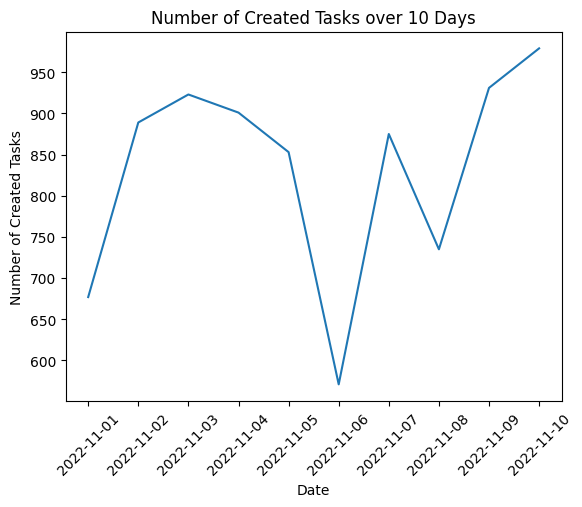

In [119]:
# task distribution

# Group by date and count the number of unique taskId values
created_tasks = df.groupby('createdDate')['taskId'].nunique()

plt.plot(created_tasks.index, created_tasks.values)
plt.xlabel('Date')
plt.ylabel('Number of Created Tasks')
plt.title('Number of Created Tasks over 10 Days')

plt.xticks(rotation=45)

plt.show()


In [120]:
created_tasks

createdDate
2022-11-01    677
2022-11-02    889
2022-11-03    923
2022-11-04    901
2022-11-05    853
2022-11-06    571
2022-11-07    875
2022-11-08    735
2022-11-09    931
2022-11-10    979
Name: taskId, dtype: int64

## Task Status

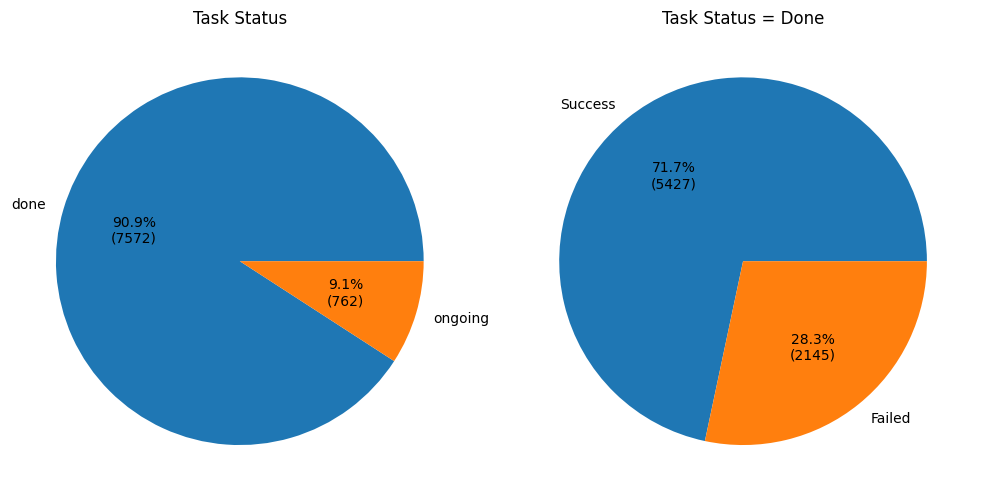

In [129]:
taskstatus_cnt = df['taskStatus'].value_counts()

temp = df[df['taskStatus'] == 'done']['UserVar_taskStatusLabel'].value_counts()

# Function to format the autopct labels
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({:d})'.format(pct, val)
    return my_format

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart
ax1.pie(taskstatus_cnt, labels=taskstatus_cnt.index, autopct=autopct_format(taskstatus_cnt))
ax1.set_title('Task Status')

# Plot the second pie chart
ax2.pie(temp, labels=temp.index, autopct=autopct_format(temp))
ax2.set_title('Task Status = Done')

fig.tight_layout()

plt.show()


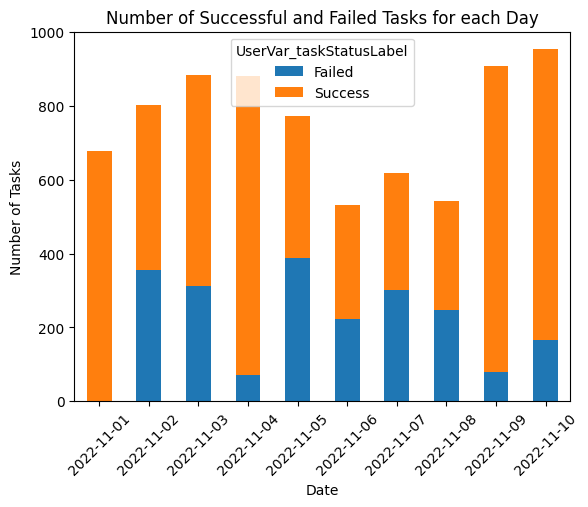

In [130]:
# Successful and Failed Tasks for each Day

# Filter the data for done tasks
done_tasks = df[df['taskStatus'] == 'done']

# Group by date and UserVar_taskStatusLabel and count the number
task_status_counts = done_tasks.groupby(['createdDate', 'UserVar_taskStatusLabel']).size().unstack(fill_value=0)

task_status_counts.plot(kind='bar', stacked=True)
plt.xlabel('Date')
plt.ylabel('Number of Tasks')
plt.title('Number of Successful and Failed Tasks for each Day')

plt.xticks(rotation=45)

plt.show()


In [131]:
task_status_counts

UserVar_taskStatusLabel,Failed,Success
createdDate,,
2022-11-01,0,677
2022-11-02,356,446
2022-11-03,313,570
2022-11-04,71,811
2022-11-05,389,383
2022-11-06,224,308
2022-11-07,301,317
2022-11-08,247,296
2022-11-09,79,830


In [132]:
# check the reason why the tasks were failed
df[(df['taskStatus'] == 'done') & (df['UserVar_taskStatusLabel'] == 'Failed')]['UserVar_taskDetailStatusLabel'].value_counts()

MISROUTE                                             763
ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL          322
RUMAH service/ KANTOR KOSONG (MASIH DIHUNI)          304
NEW ADDRESS                                          247
DIAMBIL SENDIRI                                      100
TUTUP PADA AKHIR PEKAN service/ HARI LIBUR            70
PENERIMA TIDAK DIKENAL                                64
DITOLAK OLEH PENERIMA                                 52
PENERIMA MENOLAK BAYAR (KIRIMAN COD)                  48
PENERIMA PINDAH ALAMAT                                45
FORCE MAJEURE                                         42
MENUNGGU PEMBAYARAN COD                               27
HOLD FOR FURTHER INSTRUCTI0N                          24
PENERIMA MENOLAK MENERIMA KIRIMAN COD (TDK PESAN)     17
TUTUP/LIBUR CUTI/DINAS LUAR KOTA (KIRIMAN COD)        13
RUMAH service/ KANTOR TIDAK DIHUNI                     3
MENUNGGU KONFIRMASI NILAI COD                          2
CRISS-CROSS                    

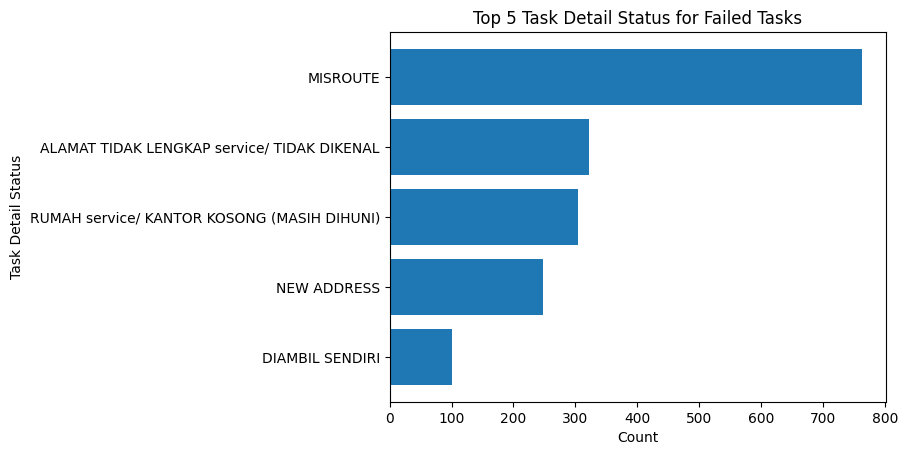

In [133]:
# Task Detail Status for Failed Tasks
failed_counts = df[(df['taskStatus'] == 'done') & (df['UserVar_taskStatusLabel'] == 'Failed')]['UserVar_taskDetailStatusLabel'].value_counts()

top_failed_counts = failed_counts.head(5).sort_values(ascending=True)

plt.barh(top_failed_counts.index, top_failed_counts.values)
plt.ylabel('Task Detail Status')
plt.xlabel('Count')
plt.title('Top 5 Task Detail Status for Failed Tasks')

plt.show()


## Waktu

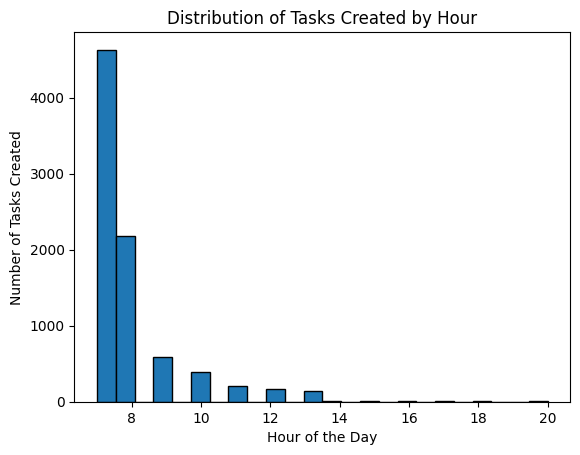

In [123]:
# task creation by hour
plt.hist(df['createdHour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tasks Created')
plt.title('Distribution of Tasks Created by Hour')
plt.show()


In [124]:
df['createdHour'].describe()

count    8334.000000
mean        7.883729
std         1.452241
min         7.000000
25%         7.000000
50%         7.000000
75%         8.000000
max        20.000000
Name: createdHour, dtype: float64

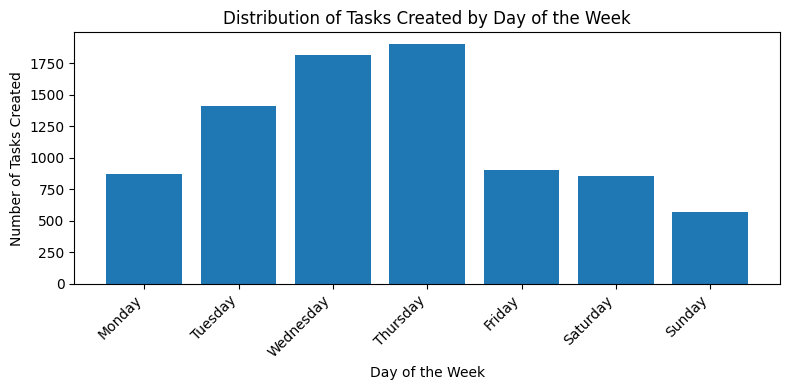

In [125]:
# task creation by day of the week
day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
task_counts = df['createdDow'].value_counts().sort_index()

plt.figure(figsize=(8, 4))

plt.bar(day_labels, task_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Tasks Created')
plt.title('Distribution of Tasks Created by Day of the Week')

plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  

plt.show()


In [126]:
task_counts

0     875
1    1412
2    1820
3    1902
4     901
5     853
6     571
Name: createdDow, dtype: int64

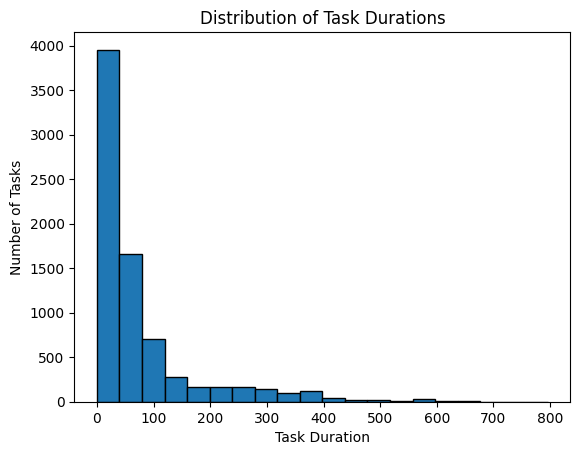

In [127]:
# Filter the data to include only done tasks
# distribution of task duration
completed_tasks = df[df['taskStatus'] == 'done']

plt.hist(completed_tasks['taskDuration'], bins=20, edgecolor='black')
plt.xlabel('Task Duration')
plt.ylabel('Number of Tasks')
plt.title('Distribution of Task Durations')
plt.show()


In [128]:
completed_tasks[completed_tasks['taskDuration'] <= 5]['taskDuration'].count()

1440

## Pekerja/Kurir

In [177]:
df['taskAssignedTo'].nunique()

2787

In [144]:
# tasks per worker in total 10 days period
print('mean : ', df.groupby('taskAssignedTo')['taskId'].count().mean())
print('min : ', df.groupby('taskAssignedTo')['taskId'].count().min())
print('max : ', df.groupby('taskAssignedTo')['taskId'].count().max())


mean :  2.9899533548618584
min :  1
max :  103


In [168]:
task_counts = df.groupby('taskAssignedTo')['taskId'].count()
max_count = task_counts.max()

# Get the count of workers with the maximum task count
num_workers_with_max_count = (task_counts == max_count).sum()

print('Max Value:', max_count)
print('Number of Workers with Max Value:', num_workers_with_max_count)

Max Value: 103
Number of Workers with Max Value: 1


In [146]:
df.groupby('taskAssignedTo')['taskId'].count().idxmax()

'gutturalLion9'

In [151]:
len(df[df['taskAssignedTo']=='gutturalLion9'])

103

In [145]:
# tasks per worker in 1 day
print('mean : ', df.groupby(['taskAssignedTo','createdDow'])['taskId'].count().mean())
print('min : ', df.groupby(['taskAssignedTo','createdDow'])['taskId'].count().min())
print('max : ', df.groupby(['taskAssignedTo','createdDow'])['taskId'].count().max())

mean :  2.193471966306923
min :  1
max :  83


In [169]:
task_counts = df.groupby(['taskAssignedTo','createdDow'])['taskId'].count()
max_count = task_counts.max()

# Get the count of workers with the maximum task count
num_workers_with_max_count = (task_counts == max_count).sum()

print('Max Value:', max_count)
print('Number of Workers with Max Value:', num_workers_with_max_count)


Max Value: 83
Number of Workers with Max Value: 1


In [147]:
df.groupby(['taskAssignedTo','createdDow'])['taskId'].count().idxmax()

('gloomyLlama0', 0)

In [173]:
temp = df[df['taskStatus']=='done']

task_counts = temp.groupby(['taskAssignedTo', 'UserVar_taskStatusLabel'])['taskId'].count()
total_counts = task_counts.groupby('taskAssignedTo').sum()
success_rates = task_counts.loc[(slice(None), 'Success')] / total_counts

print('mean : ', success_rates.mean())
print('min : ', success_rates.min())
print('max : ', success_rates.max())

mean :  0.9454058458805376
min :  0.02
max :  1.0


In [175]:
min_value = success_rates.min()
indices_with_min_value = success_rates[success_rates == min_value].index
num_indices_with_min_value = len(indices_with_min_value)

print('Number of indices with min value:', num_indices_with_min_value)


Number of indices with min value: 1


In [174]:
max_value = success_rates.max()
indices_with_max_value = success_rates[success_rates == max_value].index
num_indices_with_max_value = len(indices_with_max_value)

print('Number of indices with max value:', num_indices_with_max_value)


Number of indices with max value: 2020


In [166]:
success_rates.idxmin()

'mellowDoughnut1'

In [164]:
df[df['taskAssignedTo']=='mellowDoughnut1']['UserVar_taskStatusLabel'].value_counts()

Failed     49
Success     1
Name: UserVar_taskStatusLabel, dtype: int64

In [179]:
temp = df[df['taskStatus'] == 'done']

task_counts = temp.groupby(['taskAssignedTo', 'createdDow', 'UserVar_taskStatusLabel'])['taskId'].count()
total_counts = task_counts.groupby(['taskAssignedTo', 'createdDow']).sum()
success_rates = task_counts.loc[(slice(None), slice(None), 'Success')] / total_counts

print('mean : ', success_rates.mean())
print('min : ', success_rates.min())
print('max : ', success_rates.max())

mean :  0.9768939924634212
min :  0.02631578947368421
max :  1.0


In [180]:
min_value = success_rates.min()
indices_with_min_value = success_rates[success_rates == min_value].index
num_indices_with_min_value = len(indices_with_min_value)

print('Number of indices with min value:', num_indices_with_min_value)


Number of indices with min value: 1


In [181]:
max_value = success_rates.max()
indices_with_max_value = success_rates[success_rates == max_value].index
num_indices_with_max_value = len(indices_with_max_value)

print('Number of indices with max value:', num_indices_with_max_value)


Number of indices with max value: 2860


## Branch

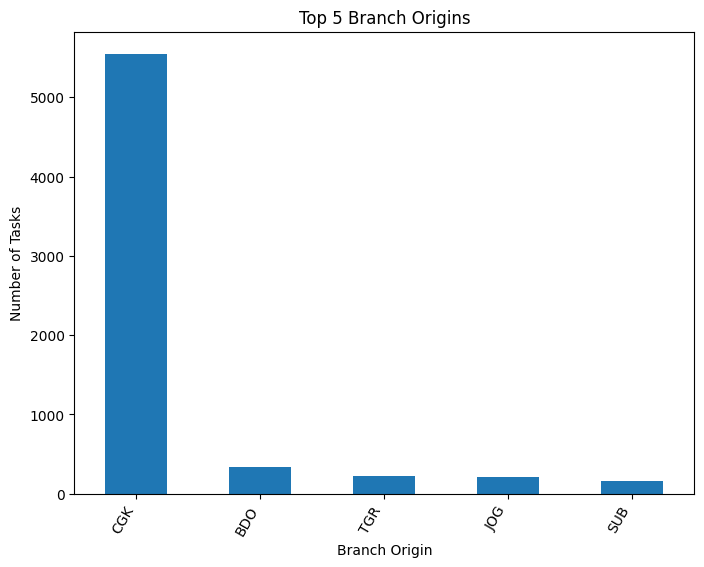

In [187]:
top_branch_origins = df['UserVar_branch_origin'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
bar_plot = top_branch_origins.plot(kind='bar')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')
plt.xlabel('Branch Origin')
plt.ylabel('Number of Tasks')
plt.title('Top 5 Branch Origins')
plt.show()


In [189]:
top_branch_origins

CGK    5550
BDO     341
TGR     226
JOG     206
SUB     164
Name: UserVar_branch_origin, dtype: int64

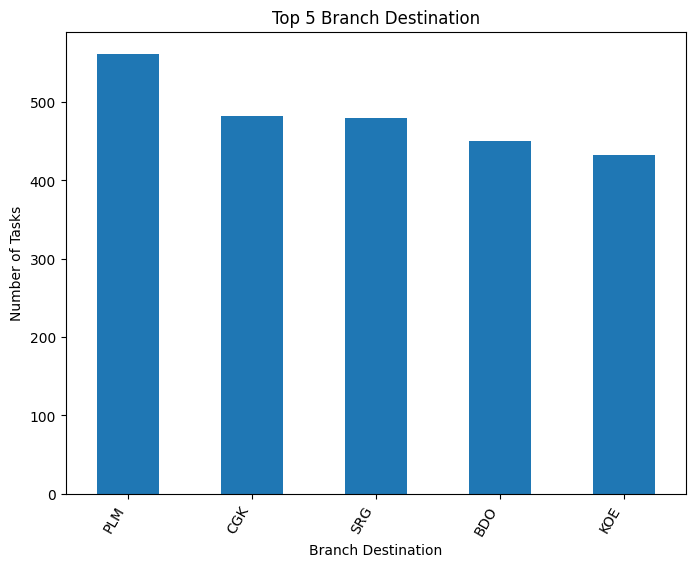

In [188]:
top_branch_dest = df['UserVar_branch_dest'].value_counts().nlargest(5)

plt.figure(figsize=(8, 6))
bar_plot = top_branch_dest.plot(kind='bar')
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=60, ha='right')
plt.xlabel('Branch Destination')
plt.ylabel('Number of Tasks')
plt.title('Top 5 Branch Destination')
plt.show()


In [199]:
origin_dest_counts = df.groupby(['UserVar_branch_origin', 'UserVar_branch_dest']).size().reset_index(name='count')
sorted_counts = origin_dest_counts.sort_values('count', ascending=False)
sorted_counts

,UserVar_branch_origin,UserVar_branch_dest,count
244,CGK,PLM,406
254,CGK,SRG,373
207,CGK,BDO,334
216,CGK,CGK,297
210,CGK,BOO,265
...,...,...,...
466,MDN,SOC,1
465,MDN,SMD,1
464,MDN,MXG,1
460,MDN,CGK,1


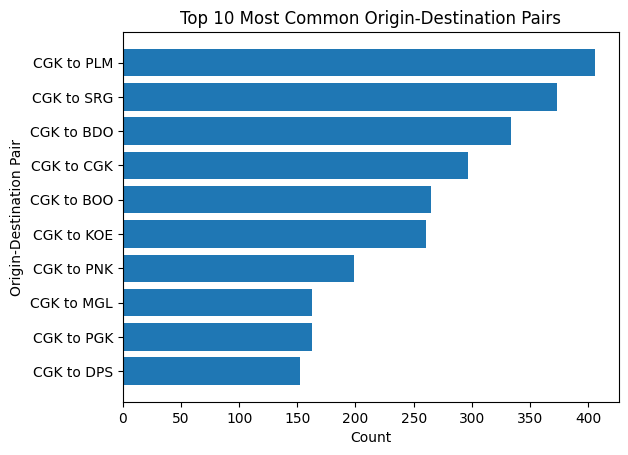

In [201]:
top_pairs = sorted_counts.head(10)
top_pairs = top_pairs.iloc[::-1]

plt.barh(top_pairs['UserVar_branch_origin'] + ' to ' + top_pairs['UserVar_branch_dest'], top_pairs['count'])
plt.xlabel('Count')
plt.ylabel('Origin-Destination Pair')
plt.title('Top 10 Most Common Origin-Destination Pairs')
plt.show()